| Problem | Formula|Search Domain|
|---      |----    |----|
|ZDT1|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g} \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT2|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-(f1/g)^2 \\\end{cases}} \text{  where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT3|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g}-(f_1/g)sin(10\pi f_1) \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|

# ZDT3 problem 
## - (#variables / #objectives)
## - 10/2
## - 20/2

 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`


In [1]:
import time 
import xlsxwriter
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
from pymoo.indicators.igd_plus import IGDPlus
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images
import pandas as pd 
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 
ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),result['path'])
    F = np.loadtxt(path)
    nadir_point = np.max(F,axis=0)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = IGDPlus(pf,zero_to_one=False)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    #final_result.loc[:,'nadir_point'] =  list(nadir_arr)
    final_result.loc[:,'ref_point'] = str(ref_point)
    final_result = final_result[['Problem', 'Objectives', 'n_variables', 'pf_shape', 
            'hv', 'igd_plus','nadir_point', 
            'data_point_shape', 
            'path', 'image_location', 
            'hv_exc_time', 'ref_point']]
    print(f'ref_point is {ref_point}')
    return final_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

In [2]:
pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
folder_2 = os.path.dirname(folder)
folder_2
filename = 'Random_Search_Result'
path = os.path.join(folder, filename)

result = pd.read_csv(path)
result['path'] = result['path'].str[39:]
result['image_location'] = result['image_location'].str[39:]
result = result.drop(columns=['xl','xu'])

def nadir_get(result_cc):
    path = os.path.join(folder_2,result_cc)
    F = np.loadtxt(path)
    if np.ndim(F) ==1:
        return F
    else: 
        nadir_point = np.max(F,axis=0)
        return nadir_point


result.loc[:,'nadir_point'] = result['path'].apply(nadir_get)

result = result.loc[result['Problem']=='ZDT3'].reset_index(drop=True)
zdt3_10= result.loc[result['n_variables']==10].reset_index(drop=True)
zdt3_20= result.loc[result['n_variables']==20].reset_index(drop=True)
print(f"The number of records {len(zdt3_10)}")
print(f"The number of records {len(zdt3_20)}")

The number of records 13
The number of records 13


# zdt3 with 10 variables

In [3]:
#path and image path indicating location of objective file and visualization file
zdt3_10.iloc[:,-2:].head(5)

,image_location,nadir_point
0,Result/Images/Random_Search/ZDT3/ZDT3_Obj-2_Va...,"[0.6657175586277898, 5.166823813504244]"
1,Result/Images/Random_Search/ZDT3/ZDT3_Obj-2_Va...,"[0.6604202770764078, 5.648014508898122]"
2,Result/Images/Random_Search/ZDT3/ZDT3_Obj-2_Va...,"[0.8472189657930136, 6.120015005679944]"
3,Result/Images/Random_Search/ZDT3/ZDT3_Obj-2_Va...,"[0.8548735222819366, 6.247351408065602]"
4,Result/Images/Random_Search/ZDT3/ZDT3_Obj-2_Va...,"[0.8532697934017902, 6.032930472330291]"


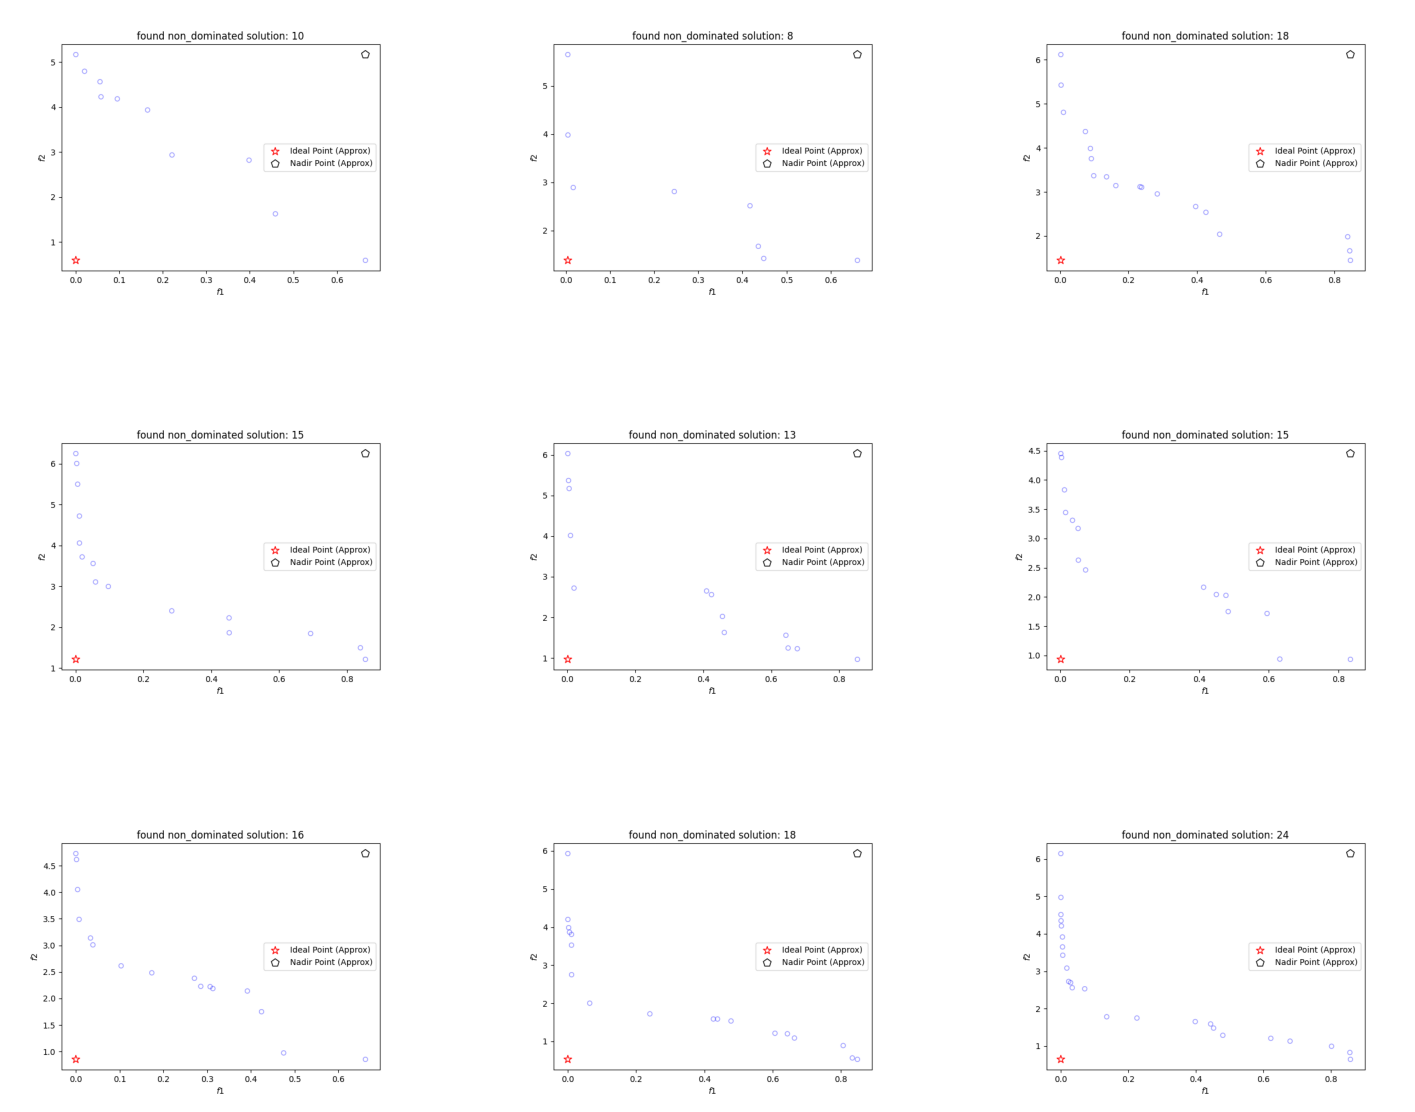

In [4]:
# more figures can be found here: Result/Images/KUR1/..

plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = zdt3_10['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.axis('off')
    plt.imshow(img)

In [6]:
nadir_arr  = np.array([i for i in np.array(zdt3_10['nadir_point'])])

print(np.round(np.max(nadir_arr, axis=0)))
ref_point = np.array([1 ,6])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_10_pf' ))
zdt3_10_table_1 = hv_result(zdt3_10)

[1. 6.]
ref_point is [1 6]


In [7]:
ref_point = np.array([5 ,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_10_pf' ))
zdt3_10_table_2 = hv_result(zdt3_10)

ref_point is [5 5]


In [8]:
ref_point = np.array([1 ,1])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_10_pf' ))
zdt3_10_table_3 = hv_result(zdt3_10)

ref_point is [1 1]


In [9]:
pd.concat([zdt3_10_table_1,zdt3_10_table_2,zdt3_10_table_3]).to_excel('Excel/Excel_Random/zdt3_10.xlsx', engine = 'xlsxwriter')

# zdt3 with 20 variables

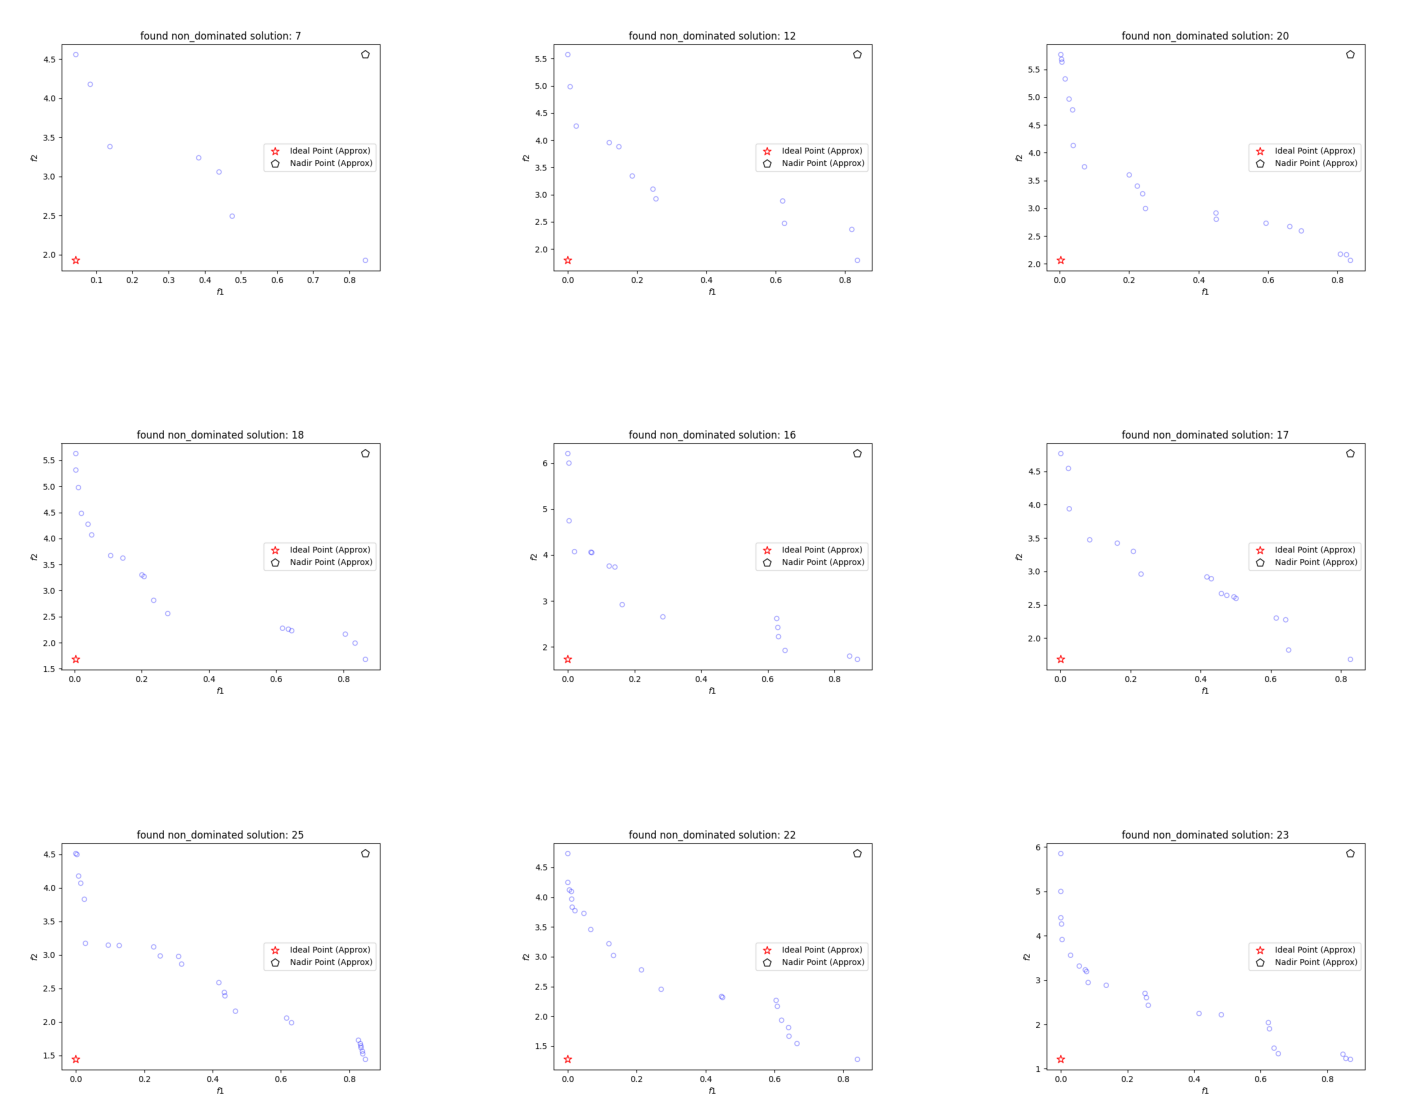

In [10]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = zdt3_20['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.axis('off')
    plt.imshow(img)

In [11]:
nadir_arr  = np.array([i for i in np.array(zdt3_20['nadir_point'])])

print(np.round(np.max(nadir_arr, axis=0)))
ref_point = np.array([1,1])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_20_pf' ))
zdt3_10_table_1 = hv_result(zdt3_20)

[1. 6.]
ref_point is [1 1]


In [12]:
ref_point = np.array([5,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_20_pf' ))
zdt3_10_table_2 = hv_result(zdt3_20)

ref_point is [5 5]


In [13]:
ref_point = np.array([1,6])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt3_20_pf' ))
zdt3_10_table_3 = hv_result(zdt3_20)

ref_point is [1 6]


In [29]:
pd.concat([zdt3_10_table_1,zdt3_10_table_2,zdt3_10_table_3]).to_excel('Excel/Excel_Random/zdt3_20.xlsx', engine = 'xlsxwriter')